In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/bank/bank.csv',sep=';')
df['y'] = df['y'].replace('yes',1).replace('no',0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


## Undersampling

In [2]:
df_no = df[df['y'] == 0]
df_yes = df[df['y'] == 1]
df_no_reduced = df_no.sample(df_yes.shape[0],random_state=103)
df_reduced = pd.concat([df_no_reduced,df_yes],axis=0)
df_reduced = df_reduced.sample(frac=1,random_state=103)
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3437,26,services,single,secondary,no,209,yes,no,cellular,22,jul,319,2,-1,0,unknown,0
4125,30,technician,married,secondary,no,-393,yes,yes,cellular,16,jul,435,1,-1,0,unknown,1
4416,32,blue-collar,single,secondary,no,811,yes,no,cellular,14,may,563,1,-1,0,unknown,1
1532,33,technician,married,secondary,no,133,no,no,cellular,4,may,218,1,-1,0,unknown,1
1017,49,blue-collar,married,secondary,no,-454,yes,no,cellular,14,may,558,1,-1,0,unknown,1


In [3]:
df_reduced.y.value_counts()

0    521
1    521
Name: y, dtype: int64

## Spliting

In [4]:
X = df_reduced[['duration','age']]
y = df_reduced['y']
# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=103)

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

## Metrics

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

0.7238372093023255
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       176
           1       0.77      0.62      0.69       168

    accuracy                           0.72       344
   macro avg       0.73      0.72      0.72       344
weighted avg       0.73      0.72      0.72       344



## ROC

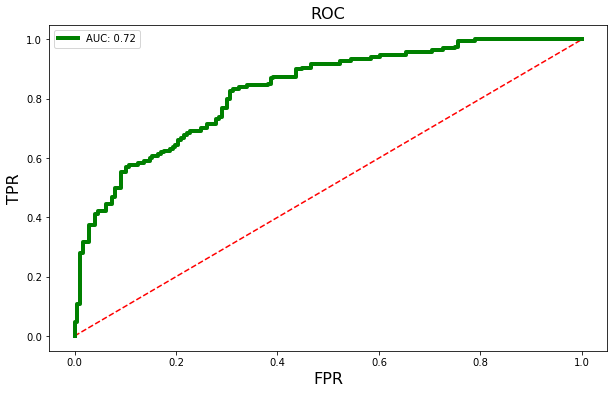

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize = (10, 6))
plt.plot([0,1], [0,1], 'r--')

probs = clf.predict_proba(X_test)

probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,probs)
roc_auc = roc_auc_score(y_test, y_test_hat)

label = 'AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('FPR', fontsize = 16)
plt.ylabel('TPR', fontsize = 16)
plt.title('ROC', fontsize = 16)
plt.legend();

## CAP

In [20]:
df_cap = df.sample(1000,random_state=20)
cap_X = df_cap[['duration','age']]
df_cap.y.value_counts()

0    900
1    100
Name: y, dtype: int64

87

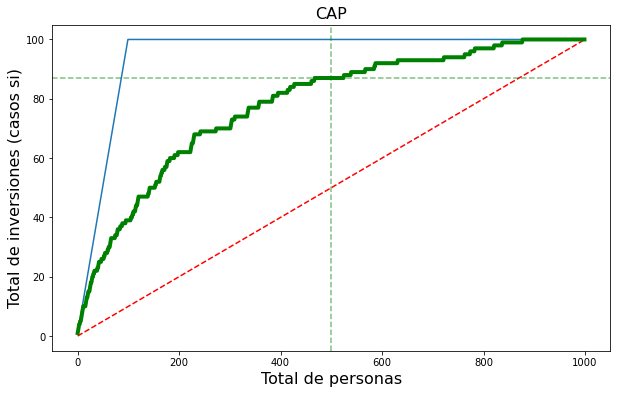

In [21]:
df_cap = df.sample(1000,random_state=20)
cap_X = df_cap[['duration','age']]

plt.figure(figsize = (10, 6))
plt.plot([0,1000], [0,100], 'r--');
# # -------------------------------------
perfect_model = np.cumsum(np.repeat(1,100))
perfect_model.resize(1000)
perfect_model[100:] = 100
perfect_model
plt.plot(perfect_model);
# # -------------------------------------
df_cap['probs'] = clf.predict_proba(cap_X)[:, 1]
df_cap = df_cap.sort_values(by='probs',ascending=False)
probs = np.cumsum(df_cap.y).values
plt.plot(probs,c = 'g', label = label, linewidth = 4);
# # -------------------------------------
plt.xlabel('Total de personas', fontsize = 16)
plt.ylabel('Total de inversiones (casos si)', fontsize = 16)
plt.title('CAP', fontsize = 16)
# # -------------------------------------
plt.axvline(x=500, color='g', linestyle='--',alpha=0.5)
plt.axhline(y=probs[499], color='g', linestyle='--',alpha=0.5)

probs[499]

In [22]:
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3437,26,services,single,secondary,no,209,yes,no,cellular,22,jul,319,2,-1,0,unknown,0
4125,30,technician,married,secondary,no,-393,yes,yes,cellular,16,jul,435,1,-1,0,unknown,1
4416,32,blue-collar,single,secondary,no,811,yes,no,cellular,14,may,563,1,-1,0,unknown,1
1532,33,technician,married,secondary,no,133,no,no,cellular,4,may,218,1,-1,0,unknown,1
1017,49,blue-collar,married,secondary,no,-454,yes,no,cellular,14,may,558,1,-1,0,unknown,1
